# Handwritten Digit Recognition using MNIST

This project aims to build a simple neural network to recognize handwritten digits using the MNIST dataset.  
MNIST is a widely used dataset in machine learning, containing 60,000 training images and 10,000 test images of handwritten digits (0-9).  

### **Objectives:**
✅ Load and preprocess the MNIST dataset  
✅ Build a neural network model using TensorFlow and Keras  
✅ Train the model on handwritten digits  
✅ Evaluate its performance on unseen test data  
✅ Make predictions on new handwritten digits  


In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt

## Loading the MNIST Dataset

The MNIST dataset consists of grayscale images of handwritten digits, each of size **28x28 pixels**.  
It is preloaded in TensorFlow/Keras and can be accessed using `keras.datasets.mnist`.  

### **Dataset Structure:**
- `train_images`: A NumPy array of shape **(60000, 28, 28)** containing **60,000 training images**.
- `train_labels`: A NumPy array of shape **(60000,)** containing labels (**digits 0-9**) for training images.
- `test_images`: A NumPy array of shape **(10000, 28, 28)** containing **10,000 test images**.
- `test_labels`: A NumPy array of shape **(10000,)** containing labels for the test images.


In [2]:
# Load the MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## **Normalization of Pixels**
Neural networks perform better when input values are in a **small, consistent range**.  
Since MNIST images have pixel values between **0 and 255**, we normalize them by dividing by **255.0**, scaling them to the range **[0,1]**:

Example:
- A pixel value of **0** (black) becomes **0.0**  
- A pixel value of **128** (gray) becomes **0.502**  
- A pixel value of **255** (white) becomes **1.0**  

**Why Normalize?**

✅ **Speeds up training** by making optimization more efficient  
✅ **Prevents numerical issues** (e.g., large weight updates, exploding gradients)  
✅ **Improves accuracy** by ensuring stable learning  
✅ **Helps activation functions** (e.g., ReLU, Sigmoid) work effectively  

In [3]:
# Normalize pixels for better training
x_train, x_test = x_train / 255.0, x_test / 255.0

## Building the Neural Network Model  

To recognize handwritten digits, we need a neural network that can process the **28x28 pixel images** and classify them into one of **10 digits (0-9)**.  

### **Model Architecture**  
Our model is a **feedforward neural network (fully connected layers)** built using Keras' `Sequential` API:  

#### Flatten Layer:
   - Converts the **28x28 image** into a **1D array of 784 values** (since `28 × 28 = 784`).  
   - This prepares the data for the dense (fully connected) layers.  

#### Hidden Dense Layer: 
   - Contains **128 neurons** with **ReLU (Rectified Linear Unit)** activation.  
   - ReLU introduces non-linearity, helping the model learn complex patterns.  

#### Output Layer:
   - Contains **10 neurons**, one for each digit (0-9).  
   - Uses **Softmax activation**, which outputs probabilities for each class.  


In [4]:
# Build the model
model = keras.Sequential([
    
    # Add the layers
    
    # flatten the 28x28 image
    keras.layers.Flatten(input_shape=(28,28)),
    
    # hidden layer with 128 neurons
    keras.layers.Dense(128, activation='relu'), 
    
    # dropout to randomly turn off 20% of neurons during training
    Dropout(0.2),
    
    # output layer with 10 neurons, one for each digit
    keras.layers.Dense(10, activation='softmax')
])

D:\PremieraAlpha\College\3rd_Year-Second Semester\CS346 F2 Intelligent Systems 2\Learn Artificial Intelligence\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model Compilation

Before training, we need to **compile** the model, which involves configuring how it learns. Compilation defines three key components:  

1. **Optimizer (`adam`)** – Determines how the model updates its weights.  
2. **Loss Function (`sparse_categorical_crossentropy`)** – Measures the error in predictions.  
3. **Metrics (`accuracy`)** – Evaluates model performance during training.  


### **Why Sparse Categorical Crossentropy as the Loss Function?**  
Since MNIST is a **multi-class classification problem** (digits 0-9), we use **cross-entropy loss**, which measures how well the predicted probabilities match the actual labels.  
- **`sparse_categorical_crossentropy`** is used because our labels are integers (e.g., `0, 1, 2, ...`).  
- If labels were **one-hot encoded**, we would use `categorical_crossentropy` instead.

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train and Evaluate the Model

We will train our model through 10 epochs and evaluate it accordingly.

In [6]:
model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {test_acc * 100}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8563 - loss: 0.4848
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9554 - loss: 0.1503
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1043
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9747 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.0636
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9833 - loss: 0.0515
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0508
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0461
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.0421
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0841
Accuracy: 98.03000092506409


## Make Predictions

We will now predict the images using our model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


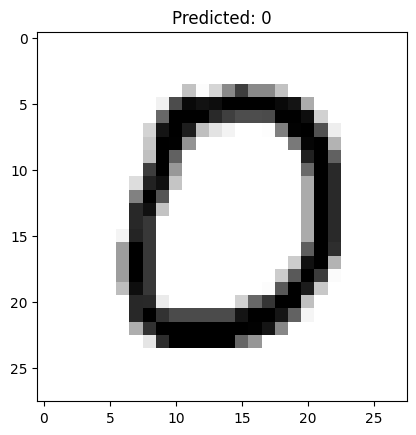

In [7]:
# choose the number of image to predicted
img_num = 10

# get the image and prediction
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[img_num])

# make a plot of the predictions
plt.imshow(x_test[img_num], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()